In [1]:
import numpy as np
import matplotlib.pyplot as plt

from netCDF4 import Dataset
from matplotlib import cm

## The geometric models -- Ball

In [2]:
# # Our 2-dimensional distribution will be over variables grid_lat and grid_lon
grid_x = np.linspace(150, 450, 301)
grid_y = np.linspace(-150, 150, 301)
grid_depth = np.linspace(150, 450, 301)

# Make sure Coordinates are ascendingly sorted
grid_x.sort()
grid_y.sort()

center_x, center_y, center_depth = 300.0, 0.0, 300.0
ballsize = 100

GridX, GridY, GridDepth = np.meshgrid(grid_x, grid_y, grid_depth, indexing='ij')
MLtomo_ptb = np.zeros((len(grid_x), len(grid_y), len(grid_depth)))
condition_index = (GridX-center_x)**2 + (GridY-center_y)**2 + (GridDepth-center_depth)**2 < ballsize**2
MLtomo_ptb[condition_index] = -0.05

### Plot Slice

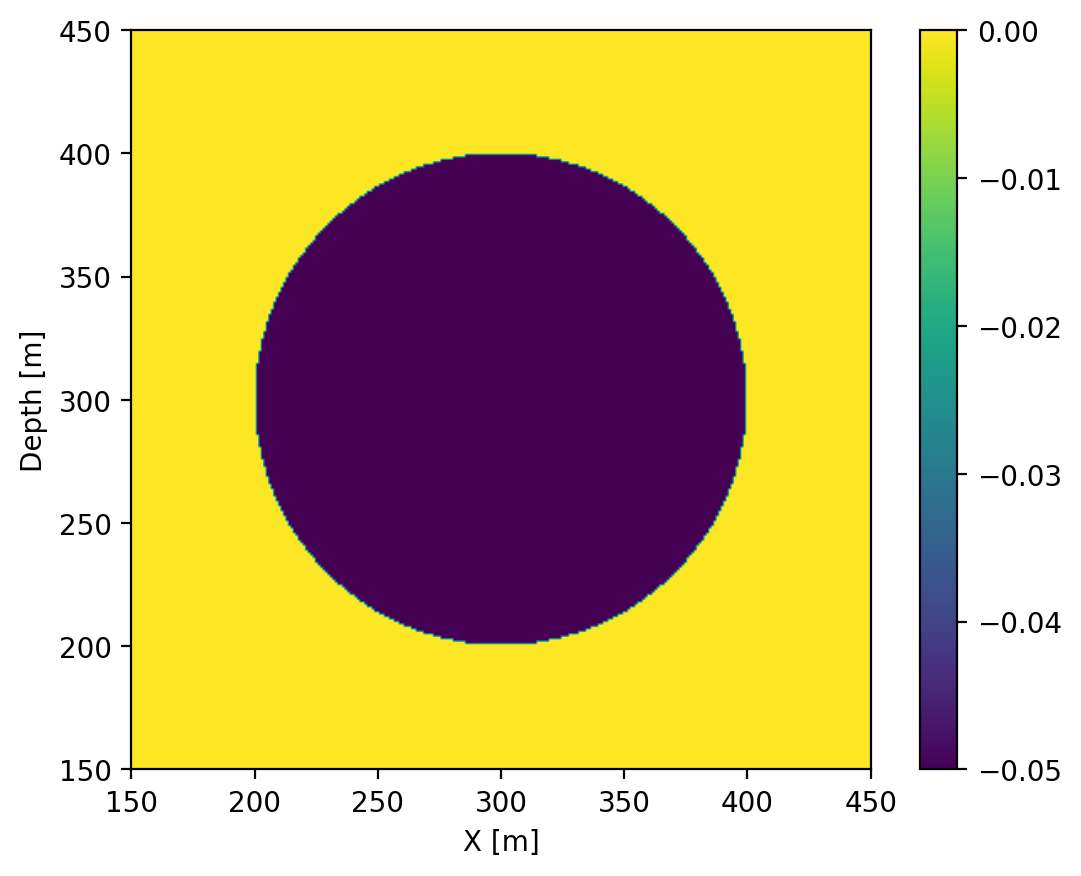

In [3]:
# Locate y=0 slice
y_index = np.where(grid_y==0)[0][0]

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(dpi=200)
ax = fig.gca()
# ax = fig.gca(projection='3d')

extent = np.min(grid_x), np.max(grid_x), np.min(grid_depth), np.max(grid_depth)
PLOT = ax.imshow(MLtomo_ptb[:,y_index,:].T, cmap=cm.viridis, interpolation='bilinear', extent=extent, origin='lower')
ax.set_aspect(1)

# PLOT = ax.pcolormesh(grid_x, grid_depth, MLtomo_ptb[:,y_index,:].T, cmap=cm.viridis)


ax.set_aspect(1)
ax.set_xlabel("X [m]")
ax.set_ylabel("Depth [m]")
plt.colorbar(PLOT)

# plt.savefig("IC_Scattering_plot.png", format="png")
plt.show()

## The geometric models -- Cyclinder

In [5]:
# # Our 2-dimensional distribution will be over variables grid_lat and grid_lon
grid_x = np.linspace(150, 450, 301)
grid_y = np.linspace(-2000, 2000, 4001)
grid_depth = np.linspace(150, 450, 301)

# Make sure Coordinates are ascendingly sorted
grid_x.sort()
grid_y.sort()

center_x, center_y, center_depth = 300.0, 0.0, 300.0
cyclindersize = 100

GridX, GridY, GridDepth = np.meshgrid(grid_x, grid_y, grid_depth, indexing='ij')
MLtomo_ptb = np.zeros((len(grid_x), len(grid_y), len(grid_depth)))
condition_index = (GridX-center_x)**2 + (GridDepth-center_depth)**2 < cyclindersize**2
MLtomo_ptb[condition_index] = -0.05

### Plot Slice

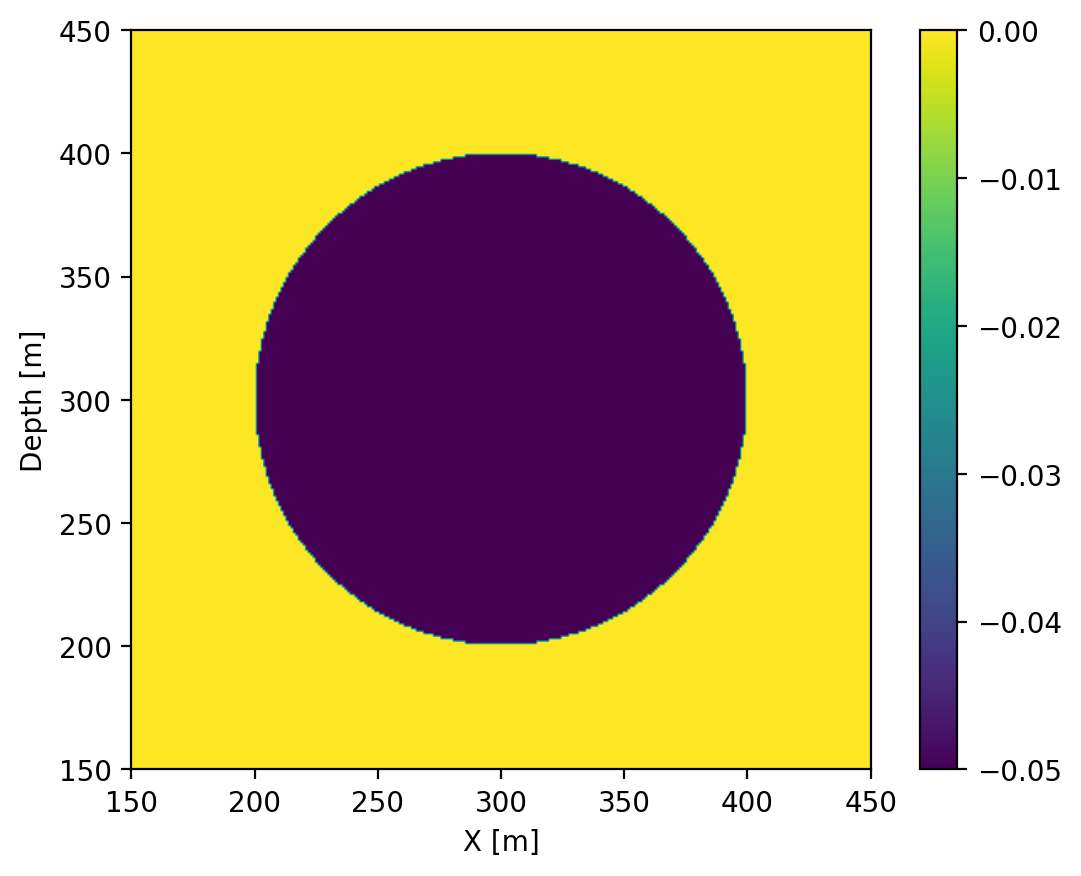

In [6]:
# Locate y=0 slice
y_index = np.where(grid_y==500)[0][0]

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(dpi=200)
ax = fig.gca()
# ax = fig.gca(projection='3d')

extent = np.min(grid_x), np.max(grid_x), np.min(grid_depth), np.max(grid_depth)
PLOT = ax.imshow(MLtomo_ptb[:,y_index,:].T, cmap=cm.viridis, interpolation='bilinear', extent=extent, origin='lower')
ax.set_aspect(1)

# PLOT = ax.pcolormesh(grid_x, grid_depth, MLtomo_ptb[:,y_index,:].T, cmap=cm.viridis)


ax.set_aspect(1)
ax.set_xlabel("X [m]")
ax.set_ylabel("Depth [m]")
plt.colorbar(PLOT)

# plt.savefig("IC_Scattering_plot.png", format="png")
plt.show()

In [10]:
MLtomo_ptb[:,:,:] = MLtomo_ptb[:,:,:]*2

print(grid_x.min(),grid_x.max())
print(grid_y.min(),grid_y.max())
print(grid_depth.min(),grid_depth.max())
print(MLtomo_ptb.min(),MLtomo_ptb.max())

# write to file
name = 'cylinder_20pct'
if os.path.exists('./%s.nc' %name):
    os.remove('./%s.nc' %name)

nc = Dataset('./%s.nc' %name, 'w')
nc.createDimension('nx', size=len(grid_x))
nc.createDimension('ny', size=len(grid_y))
nc.createDimension('ndepth', size=len(grid_depth))
nc.createVariable('x', float, dimensions=('nx'))
nc['x'][:] = grid_x
nc.createVariable('y', float, dimensions=('ny'))
nc['y'][:] = grid_y
nc.createVariable('depth', float, dimensions=('ndepth'))
nc['depth'][:] = grid_depth
nc.createVariable('dvp', float, dimensions=('nx', 'ny','ndepth'))
nc['dvp'][:,:,:] = MLtomo_ptb[:,:,:]
nc.close()

150.0 450.0
-2000.0 2000.0
150.0 450.0
-0.2 0.0
